In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
train_df= pd.read_csv(r'C:\Users\serde\OneDrive\Masaüstü\fashion_mnist\fashion-mnist_train.csv')
test_df= pd.read_csv(r'C:\Users\serde\OneDrive\Masaüstü\fashion_mnist\fashion-mnist_test.csv')
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
labels=["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
 "Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
#kerasta kullanabilmemiz için data frame'leri numpy arraylere çevirmemiz gerekli
train_data=np.array(train_df, dtype='float32')
test_data=np.array(test_df, dtype='float32')

#verileri labellar ve pikseller olarak x ve y şeklinde ayırıyoruz
x_train= train_data[:,1:]/255  #bütün satırları al, label olan ilk sütunu alma
y_train= train_data[:,0] #bütün satırları al ve sadece ilk sütunu al 
x_test= test_data[:,1:]/255 
y_test= test_data[:,0] 
#piksel değerlerinin 0-255 arası değil 0-1 arası olmasını istiyoruz bundan dolayı 255'e böldük


In [5]:
x_train, x_val, y_train, y_val= train_test_split(
x_train, y_train, test_size=0.2, random_state=None)
#modeli iyileştirebilmek için validation bölümü ayrıldı

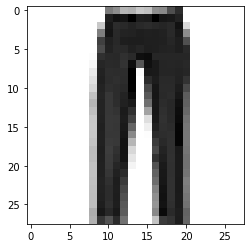

In [6]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_val=x_val.reshape(x_val.shape[0],28,28,1)

plt.imshow(x_train[88], cmap='Greys')
plt.show()
#şu an her biri görsel formatına geldi

In [7]:
import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import TensorBoard

In [8]:
cnn_model=Sequential([Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
                     MaxPooling2D(pool_size=2),
                     Dropout(0.2), # zayıf bilgilerin unutulması için
                     Flatten(),
                     Dense(100, activation='relu'),
                     Dense(50, activation='relu'),
                     Dense(10, activation='softmax')])

In [9]:
cnn_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=Adam(learning_rate=0.001),
                 metrics=['accuracy'])

In [10]:
fit= cnn_model.fit(x_train, y_train, 
             batch_size=512,
             epochs=10,
             shuffle=True,
             verbose=1,
             validation_data=(x_val,y_val)
             )

Epoch 1/10
94/94 [==============================] - 14s 149ms/step - loss: 0.7473 - accuracy: 0.7378 - val_loss: 0.4773 - val_accuracy: 0.8321
Epoch 2/10
94/94 [==============================] - 14s 149ms/step - loss: 0.4309 - accuracy: 0.8486 - val_loss: 0.4019 - val_accuracy: 0.8575
Epoch 3/10
94/94 [==============================] - 15s 161ms/step - loss: 0.3735 - accuracy: 0.8683 - val_loss: 0.3579 - val_accuracy: 0.8752
Epoch 4/10
94/94 [==============================] - 16s 172ms/step - loss: 0.3358 - accuracy: 0.8821 - val_loss: 0.3244 - val_accuracy: 0.8852
Epoch 5/10
94/94 [==============================] - 16s 175ms/step - loss: 0.3130 - accuracy: 0.8897 - val_loss: 0.3179 - val_accuracy: 0.8841
Epoch 6/10
94/94 [==============================] - 16s 170ms/step - loss: 0.2942 - accuracy: 0.8961 - val_loss: 0.2951 - val_accuracy: 0.8938
Epoch 7/10
94/94 [==============================] - 16s 171ms/step - loss: 0.2775 - accuracy: 0.9004 - val_loss: 0.2886 - val_accuracy: 0.8952

In [11]:
y_pred=cnn_model.predict(x_test)

In [12]:
score=cnn_model.evaluate(x_test,y_test,verbose=1)

print('loss: {:.4f}'.format(score[0]))
print('accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.2531 - accuracy: 0.9096
loss: 0.2531
accuracy: 0.9096


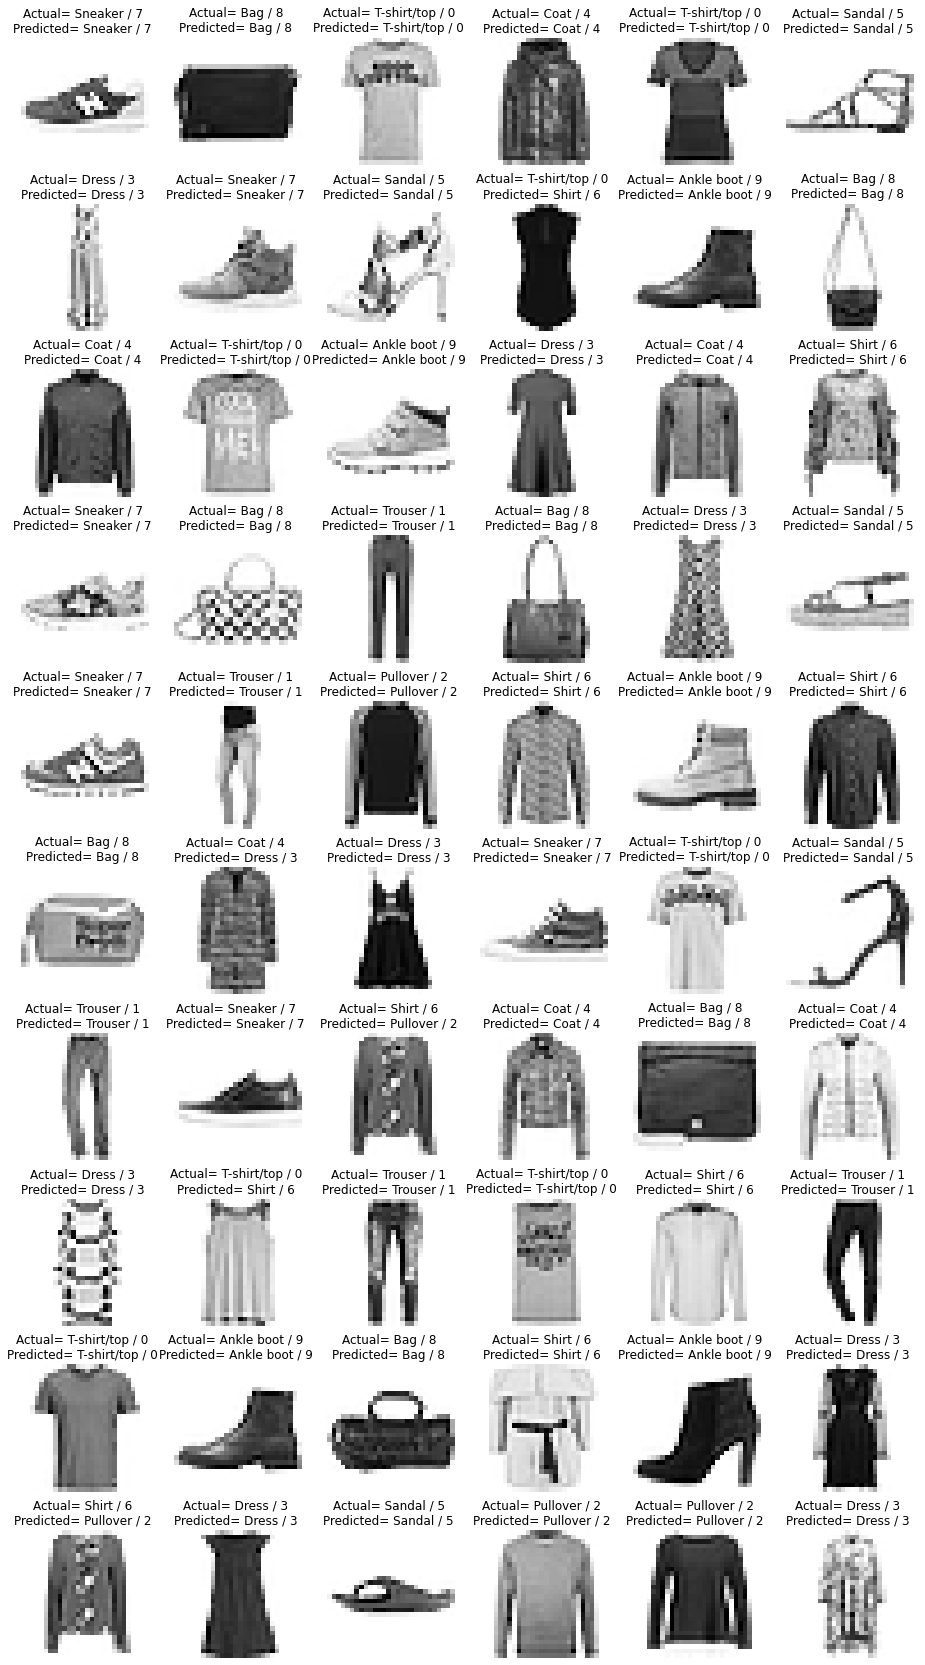

In [13]:
plt.figure(figsize=(16,30))

j=1
result=" "
for i in np.random.randint(0,1000,60):
    plt.subplot(10,6, j)
    j+=1
    plt.imshow(x_test[i], cmap="Greys")
    plt.title("Actual= {} / {} \nPredicted= {} / {} ".format(labels[y_test[i].astype(int)],y_test[i].astype(int),labels[np.argmax(y_pred[i]).astype(int)],np.argmax(y_pred[i])))
    plt.axis("off")
 